In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import mixture

In [2]:
hinsel_df = pd.read_csv("./clean_data/clean_hinsel.csv")

In [3]:
hinsel_df.head(4)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.334652,0.002727,0.054515,0.265214,0.165955,0.006267,0.0,0.034324,0.009077,0.001381,...,100.911343,0.256455,0.404257,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.441332,0.002393,0.157184,0.204246,0.052486,0.000000,0.0,0.315968,0.003177,0.010093,...,65.515920,0.566759,0.491791,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,0.486323,0.017873,0.211711,0.245662,0.039998,0.000000,0.0,0.003168,0.001563,0.003664,...,84.437574,0.466575,0.491928,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.383839,0.006636,0.158500,0.377851,0.046453,0.000000,0.0,0.010741,0.013657,0.001535,...,66.491785,0.371283,0.632375,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
hinsel_df = pd.get_dummies(hinsel_df)

In [5]:
hinsel_df.head(4)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.334652,0.002727,0.054515,0.265214,0.165955,0.006267,0.0,0.034324,0.009077,0.001381,...,100.911343,0.256455,0.404257,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.441332,0.002393,0.157184,0.204246,0.052486,0.000000,0.0,0.315968,0.003177,0.010093,...,65.515920,0.566759,0.491791,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,0.486323,0.017873,0.211711,0.245662,0.039998,0.000000,0.0,0.003168,0.001563,0.003664,...,84.437574,0.466575,0.491928,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.383839,0.006636,0.158500,0.377851,0.046453,0.000000,0.0,0.010741,0.013657,0.001535,...,66.491785,0.371283,0.632375,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
X = hinsel_df = hinsel_df.drop(columns=['experts::0','experts::1','experts::2','experts::3','experts::4','experts::5','consensus'], axis=1)


In [7]:
print(type(X))
X = X.as_matrix()

<class 'pandas.core.frame.DataFrame'>


c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
print(type(X))

<class 'numpy.ndarray'>


In [9]:
print(X)

[[3.34652080e-01 2.72747201e-03 5.45147933e-02 ... 1.00911343e+02
  2.56454753e-01 4.04257200e-01]
 [4.41332142e-01 2.39289926e-03 1.57184232e-01 ... 6.55159205e+01
  5.66758825e-01 4.91790957e-01]
 [4.86322531e-01 1.78730686e-02 2.11711307e-01 ... 8.44375737e+01
  4.66574971e-01 4.91928230e-01]
 ...
 [5.22521036e-01 5.41764389e-03 1.11651245e-01 ... 1.69984141e+02
  2.85631483e-01 5.03967871e-01]
 [6.27448855e-01 5.93533186e-03 3.94954949e-01 ... 1.40276292e+02
  4.49318543e-01 5.57232620e-01]
 [5.72482931e-01 4.41350546e-03 3.80682983e-01 ... 7.19217907e+01
  2.94906725e-01 4.12953083e-01]]


In [10]:
X.shape

(97, 62)

In [11]:
print(X[1,:])

[4.41332142e-01 2.39289926e-03 1.57184232e-01 2.04246273e-01
 5.24864197e-02 0.00000000e+00 0.00000000e+00 3.15967845e-01
 3.17742284e-03 1.00929588e-02 0.00000000e+00 0.00000000e+00
 9.71990563e-02 2.78274393e-02 2.78283277e-01 1.29526269e+02
 5.93369026e+01 7.01893668e+01 1.88863172e+02 7.39821337e+01
 3.46303879e+01 3.93517458e+01 1.08612522e+02 1.56661289e+02
 7.23766207e+01 8.42846678e+01 2.29037909e+02 1.33551195e+02
 6.34231124e+01 7.01280821e+01 1.96974307e+02 8.35152056e+01
 4.50884123e+01 3.84267933e+01 1.28603618e+02 1.41222078e+02
 6.73614922e+01 7.38605855e+01 2.08583570e+02 4.18768242e+00
 2.94602543e+00 1.30104648e+02 2.49893133e+01 1.57552816e+02
 7.17321355e+01 3.95259976e+00 2.82463091e+00 1.08819321e+02
 3.06461559e+01 1.47697599e+02 6.87074434e+01 9.73527134e-01
 4.53333170e-01 8.76908711e-01 5.03281740e-01 6.58179667e-01
 6.70534451e-01 9.66245256e-01 4.56749608e-01 6.55159205e+01
 5.66758825e-01 4.91790957e-01]


In [12]:
print(X[:4,:])

[[3.44646644e-01 3.07978844e-03 4.75217078e-02 2.88215582e-01
  1.78584943e-01 1.65638804e-02 0.00000000e+00 4.34998329e-02
  1.01493804e-02 1.33237528e-04 0.00000000e+00 0.00000000e+00
  8.58331208e-02 2.49069357e-02 2.63560376e-01 3.75944577e+01
  1.57850211e+01 2.18094366e+01 5.33794789e+01 1.09918445e+02
  3.87354207e+01 7.11830239e+01 1.48653865e+02 5.50296178e+01
  2.21603304e+01 3.28692874e+01 7.71899482e+01 3.85613673e+01
  3.81190589e+01 4.42308395e-01 7.66804262e+01 9.51097546e+01
  5.15650522e+01 4.35447024e+01 1.46674807e+02 4.88084744e+01
  4.07652275e+01 8.04324681e+00 8.95737019e+01 5.01462752e+00
  2.99194386e+00 1.67952780e+02 2.58131634e+01 1.09919447e+02
  3.87337405e+01 5.09080064e+00 2.93664998e+00 1.59486916e+02
  3.84372937e+01 9.51238887e+01 5.15830295e+01 9.23066594e-01
  3.73371375e-01 8.44453818e-01 4.08129653e-01 6.03399080e-01
  5.71175289e-01 9.62995322e-01 3.57890258e-01 8.54743113e+01
  2.65933125e-01 3.46293521e-01]
 [1.65329348e-01 0.00000000e+00 4.823

In [12]:
print(X[0:2,0:2])

[[0.33465208 0.00272747]
 [0.44133214 0.0023929 ]]


In [13]:
print(X[0:2,:])

[[3.34652080e-01 2.72747201e-03 5.45147933e-02 2.65213546e-01
  1.65955311e-01 6.26655390e-03 0.00000000e+00 3.43242161e-02
  9.07730991e-03 1.38131516e-03 4.23872425e-03 0.00000000e+00
  1.37120377e-01 3.74185688e-02 3.47649996e-01 1.36601965e+02
  4.62726932e+01 9.03292716e+01 1.82874658e+02 8.24071841e+01
  2.65335060e+01 5.58736781e+01 1.08940690e+02 1.96652471e+02
  6.35729199e+01 1.33079551e+02 2.60225391e+02 1.10241465e+02
  5.69448594e+01 5.32966056e+01 1.67186324e+02 7.64070735e+01
  4.45456855e+01 3.18613880e+01 1.20952759e+02 1.36579772e+02
  7.31002049e+01 6.34795671e+01 2.09679977e+02 4.42597346e+00
  3.00609544e+00 1.43657351e+02 2.57515002e+01 1.96802629e+02
  6.33127143e+01 4.24367875e+00 2.78573490e+00 1.06671554e+02
  3.92786622e+01 1.39001136e+02 7.24771675e+01 8.92697049e-01
  3.74877547e-01 8.11251279e-01 4.12513470e-01 5.80850568e-01
  5.76141435e-01 9.47222524e-01 3.53298271e-01 1.00911343e+02
  2.56454753e-01 4.04257200e-01]
 [4.41332142e-01 2.39289926e-03 1.571

In [14]:
from sklearn.cluster import KMeans

In [15]:
cluster_range = range( 1, 20 )
cluster_errors = []

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [16]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

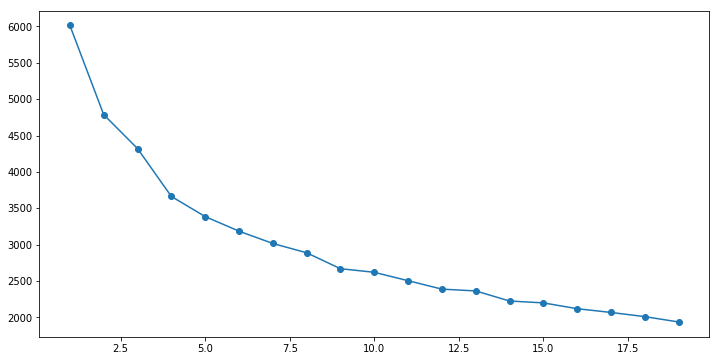

In [17]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [18]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(X)

In [19]:
kmeans.labels_

array([1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 2, 1, 3, 7, 2, 0, 3, 3, 5,
       0, 1, 5, 1, 5, 8, 3, 3, 5, 3, 1, 5, 4, 5, 6, 8, 6, 5, 3, 5, 3, 5,
       4, 6, 3, 8, 2, 8, 8, 8, 6, 2, 3, 8, 3, 6, 8, 8, 8, 8, 6, 2, 2, 2,
       6, 0, 1, 6, 8, 2, 2, 0, 8, 2, 8, 6, 5, 5, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 4, 3, 3, 3])

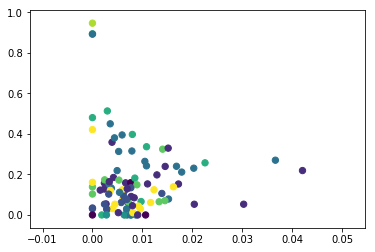

In [20]:
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, s=40, cmap='viridis');

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

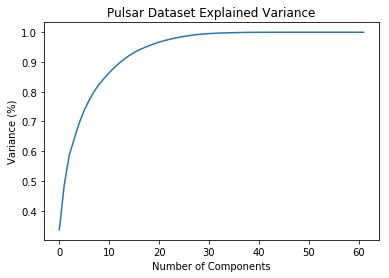

In [23]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [24]:
pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)

In [25]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( dataset )
  cluster_errors.append( clusters.inertia_ )

In [26]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [27]:
clusters_df_pca = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

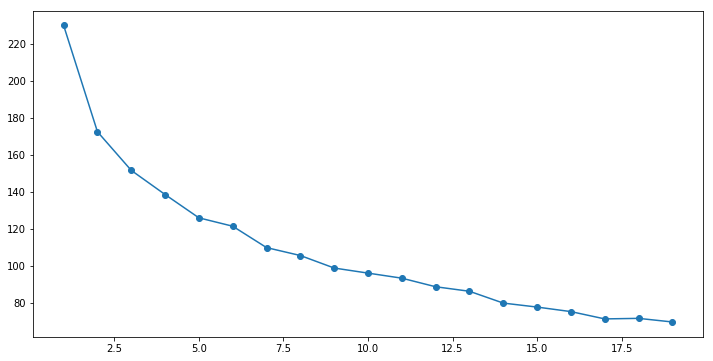

In [28]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df_pca.num_clusters, clusters_df_pca.cluster_errors, marker = "o" )

In [29]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataset)

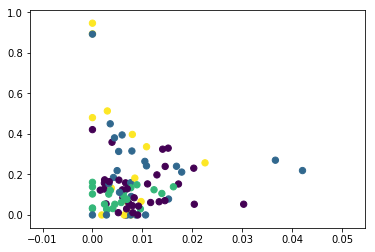

In [30]:
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, s=40, cmap='viridis');

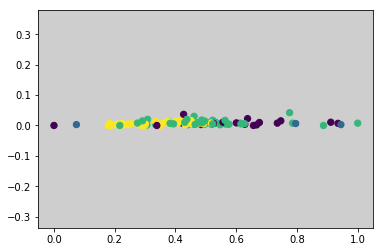

In [31]:
plot_kmeans(kmeans, X)

In [32]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(62,2))

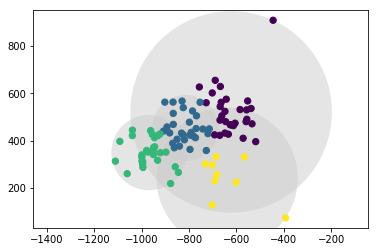

In [33]:
plot_kmeans(kmeans, X_stretched)

In [34]:
gmm =  mixture.GaussianMixture(n_components=3).fit(X)

In [35]:
labels = gmm.predict(X)

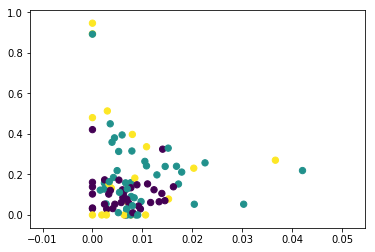

In [36]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [37]:
probs = gmm.predict_proba(X)

In [38]:
print(probs[:5].round(3))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [39]:
print(probs[5:10].round(3))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [40]:
print(probs[150:155].round(3))

[]


In [41]:
print(probs[75:80].round(3))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [42]:
size = 50 * probs.max(1)

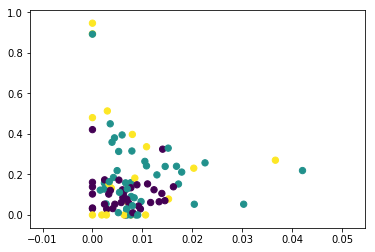

In [43]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [44]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full', random_state=42)

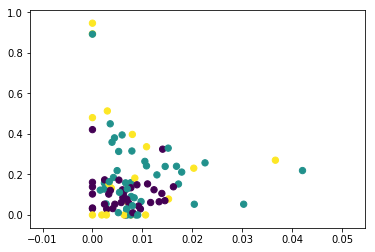

In [45]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [46]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

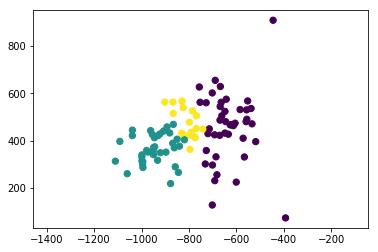

In [47]:
plot_gmm(gmm, X_stretched)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

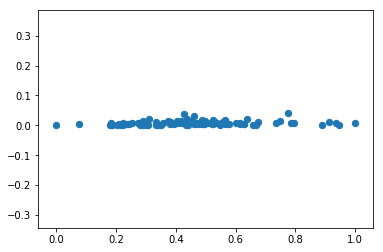

In [48]:
plot_gmm(gmm, X, label=False)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

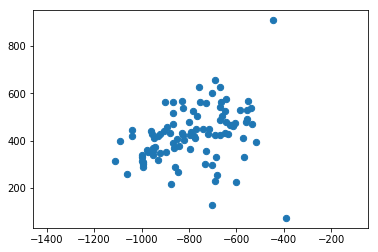

In [49]:
plot_gmm(gmm, X_stretched, label=False)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

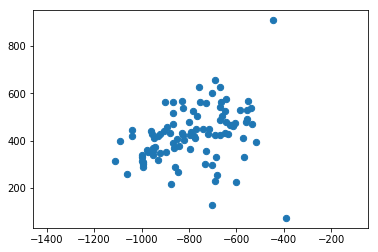

In [50]:
gmm16 = mixture.GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, X_stretched, label=False)

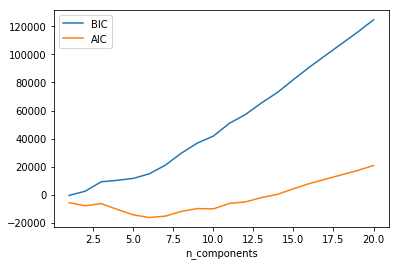

In [51]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### Modelos de mistura para as ALP